In [1]:
import csv
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
prosody_data = pd.read_csv('prosodic_features_M.csv ')

prosody_data.head()

prosody_data.info()

In [76]:
prosody_data.describe()

,duration,energy,power,min_pitch,max_pitch,mean_pitch,pitch_sd,pitch_abs,pitch_quant,pitchUvsVRatio,...,iInterval,MaxRising:3,MaxFalling:3,AvgTotRis:3,AvgTotFall:3,numRising,numFall,RecommendHiring,Hired,Hired2
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,...,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,57.347119,0.029338,0.000448,74.322155,365.431796,168.262349,41.953391,245.904205,162.598051,1.206687,...,147.552174,214.246171,212.135703,27.463743,21.541425,89.113043,5794.974496,4.945343,0.072464,0.137681
std,36.093676,0.436967,0.005672,8.282685,41.450129,42.396158,13.081761,76.500124,47.092531,0.799530,...,99.314126,53.119058,53.914190,7.688383,8.410722,59.192329,6148.773593,0.717816,0.259442,0.344815
min,10.341458,0.000176,0.000013,56.049663,222.555742,92.979514,12.053274,76.004974,82.801688,0.301339,...,17.000000,90.977000,74.731000,9.800000,5.044000,11.000000,79.872717,3.189661,0.000000,0.000000
25%,33.151526,0.002494,0.000064,71.286514,340.092387,123.345378,33.235809,194.603876,112.104090,0.738742,...,80.000000,173.149250,173.894000,22.218000,15.531500,48.000000,2715.769831,4.527523,0.000000,0.000000
50%,49.971021,0.005626,0.000118,73.919295,376.854636,178.876893,40.491230,246.512512,177.492489,1.038547,...,123.000000,207.869500,209.566000,26.938000,20.215500,76.000000,4614.342686,4.962252,0.000000,0.000000
75%,71.780495,0.013393,0.000221,75.591271,397.550374,202.789238,47.873591,292.692716,203.845659,1.361428,...,186.000000,258.004500,254.770750,32.072000,26.048000,113.000000,7327.533155,5.447008,0.000000,0.000000
max,376.992000,11.307079,0.132599,198.840510,424.360354,254.871233,97.363392,524.459680,247.959843,7.681538,...,995.000000,324.853000,323.517000,54.361000,53.887000,590.000000,115205.155600,6.647218,1.000000,1.000000


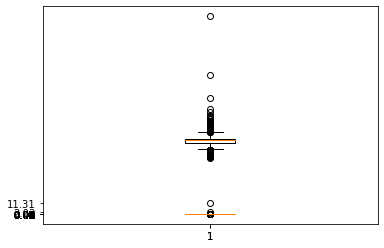

In [85]:
plt.boxplot(prosody_data['energy'])
plt.boxplot(prosody_data['min_pitch'])
plt.yticks(prosody_data['energy'])

plt.show()

sns.set_style('whitegrid')
prosody_data['RecommendHiring'].hist(bins=30)
plt.xlabel('RecommendHiring')

sns.jointplot(x='energy', y='RecommendHiring', data=prosody_data)

# Select Features Using Lasso

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
#X1=prosody_data.drop(['Row Labels','Class','Class1','RecommendHiring'],axis=1)
X1=prosody_data.drop(['participant&question','Hired','Hired2','RecommendHiring'],axis=1)

X1.info()

In [6]:
y1=prosody_data['RecommendHiring']
y1

0      5.106224
1      5.106224
2      5.106224
3      5.106224
4      5.106224
         ...   
685    4.370067
686    4.370067
687    4.370067
688    4.370067
689    4.370067
Name: RecommendHiring, Length: 690, dtype: float64

In [7]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.20, random_state=10)

In [8]:
feature_names= X1
ranks = {}
from sklearn.preprocessing import MinMaxScaler
 
def rank_to_dict(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    #ranks = map(lambda x: round(x, 5), ranks)
    return dict(zip(names, ranks ))

In [9]:
from sklearn.linear_model import Lasso 

In [10]:
lasso = Lasso(alpha=.5)
lasso.fit(X1_train, y1_train)

Lasso(alpha=0.5)

In [11]:
ranks["Lasso"] = rank_to_dict(np.abs(lasso.coef_), feature_names)
rankDict = {}
rankDict = ranks['Lasso']
rankDict

{'duration': 0.5470693379805213,
 'energy': 0.0,
 'power': 0.0,
 'min_pitch': 0.0,
 'max_pitch': 0.0,
 'mean_pitch': 0.0,
 'pitch_sd': 0.7859416647354037,
 'pitch_abs': 0.05051366024943179,
 'pitch_quant': 0.0,
 'pitchUvsVRatio': 0.0,
 'Time:8': 0.056430399196341276,
 'iDifference': 0.19276698634508277,
 'diffPitchMaxMin': 0.02787954816431496,
 'diffPitchMaxMean': 0.0,
 'diffPitchMaxMode': 0.16074442605791026,
 'intensityMin': 0.0,
 'intensityMax': 0.0,
 'intensityMean': 0.0,
 'intensitySD': 0.0,
 'intensityQuant': 0.0,
 'diffIntMaxMin': 0.0,
 'diffIntMaxMean': 0.0,
 'diffIntMaxMode': 0.0,
 'avgVal1': 0.0294842494836679,
 'avgVal2': 0.029260191482681178,
 'avgVal3': 0.0017084916680180809,
 'avgBand1': 0.9999999999999999,
 'avgBand2': 0.0,
 'avgBand3': 0.0,
 'fmean1': 0.0013421148224538018,
 'fmean2': 0.04023655601364753,
 'fmean3': 0.3082744300376113,
 'f2meanf1': 0.0,
 'f3meanf1': 0.0,
 'f1STD': 0.0,
 'f2STD': 0.15819157291305236,
 'f3STD': 0.0,
 'f2STDf1': 0.0,
 'f2STDf2': 0.0,
 'jit

In [12]:
selectedFeatures_Lasso = []
#for key,val in rankDict.items():
    #if (val > 0):
selectedFeatures_Lasso = dict(sorted(rankDict.items(), key=lambda item: item[1],reverse=True))
selectedFeatures_Lasso.keys()

selectedFeatures_Lasso_10 = []
i=0
for key in selectedFeatures_Lasso.keys():
    if(i<10):
        selectedFeatures_Lasso_10.append(key)
        i+=1
        
selectedFeatures_Lasso_20 = []
i=0
for key in selectedFeatures_Lasso.keys():
    if(i<20):
        selectedFeatures_Lasso_20.append(key)
        i+=1
        
selectedFeatures_Lasso_30 = []
i=0
for key in selectedFeatures_Lasso.keys():
    if(i<30):
        selectedFeatures_Lasso_30.append(key)
        i+=1
selectedFeatures_Lasso_30   
#rankDict

['avgBand1',
 'pitch_sd',
 'duration',
 'TotDurPause:3',
 'fmean3',
 'iDifference',
 'diffPitchMaxMode',
 'f2STD',
 'MaxFalling:3',
 'iInterval',
 'Time:8',
 'pitch_abs',
 'fmean2',
 'avgVal1',
 'avgVal2',
 'diffPitchMaxMin',
 'numFall',
 'avgVal3',
 'fmean1',
 'energy',
 'power',
 'min_pitch',
 'max_pitch',
 'mean_pitch',
 'pitch_quant',
 'pitchUvsVRatio',
 'diffPitchMaxMean',
 'intensityMin',
 'intensityMax',
 'intensityMean']

# Apply Nural Networks on Selected features using Lasso

In [13]:
import tensorflow as tf
from tensorflow import keras

In [14]:
X10=prosody_data[selectedFeatures_Lasso_10]
y10=prosody_data['Hired']
X10_train, X10_test, y10_train, y10_test = train_test_split(X10, y10, test_size=0.20, random_state=10)

X1_train

In [15]:
tf.keras.backend.set_floatx('float64')
model10 = keras.Sequential([
    keras.layers.Dense(10, input_shape=(10,), activation='relu'),
    keras.layers.Dense(18, activation='relu'),
    keras.layers.Dense(18, activation='relu'),
    keras.layers.Dense(18, activation='relu'),
    keras.layers.Dense(18, activation='relu'),
    keras.layers.Dense(18, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model10.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model10.fit(X10_train, y10_train, epochs=200)

Epoch 1/200
18/18 [==============================] - 0s 1ms/step - loss: 2.6007 - accuracy: 0.8533
Epoch 2/200
18/18 [==============================] - 0s 1ms/step - loss: 0.9646 - accuracy: 0.8424
Epoch 3/200
18/18 [==============================] - 0s 2ms/step - loss: 0.7620 - accuracy: 0.8804
Epoch 4/200
18/18 [==============================] - 0s 2ms/step - loss: 0.4801 - accuracy: 0.9094
Epoch 5/200
18/18 [==============================] - 0s 2ms/step - loss: 0.3669 - accuracy: 0.9185
Epoch 6/200
18/18 [==============================] - 0s 2ms/step - loss: 0.2950 - accuracy: 0.9275
Epoch 7/200
18/18 [==============================] - 0s 2ms/step - loss: 0.3089 - accuracy: 0.9257
Epoch 8/200
18/18 [==============================] - 0s 2ms/step - loss: 0.3511 - accuracy: 0.9275
Epoch 9/200
18/18 [==============================] - 0s 2ms/step - loss: 0.3390 - accuracy: 0.9275
Epoch 10/200
18/18 [==============================] - 0s 2ms/step - loss: 0.2634 - accuracy: 0.9275
Epoch 11/

18/18 [==============================] - 0s 3ms/step - loss: 0.2122 - accuracy: 0.9293
Epoch 84/200
18/18 [==============================] - 0s 4ms/step - loss: 0.2036 - accuracy: 0.9275
Epoch 85/200
18/18 [==============================] - 0s 4ms/step - loss: 0.2257 - accuracy: 0.9203
Epoch 86/200
18/18 [==============================] - 0s 4ms/step - loss: 0.2156 - accuracy: 0.9275
Epoch 87/200
18/18 [==============================] - 0s 3ms/step - loss: 0.1896 - accuracy: 0.9348
Epoch 88/200
18/18 [==============================] - 0s 3ms/step - loss: 0.1923 - accuracy: 0.9330
Epoch 89/200
18/18 [==============================] - 0s 2ms/step - loss: 0.2117 - accuracy: 0.9257
Epoch 90/200
18/18 [==============================] - 0s 2ms/step - loss: 0.1980 - accuracy: 0.9293
Epoch 91/200
18/18 [==============================] - 0s 3ms/step - loss: 0.2152 - accuracy: 0.9239
Epoch 92/200
18/18 [==============================] - 0s 3ms/step - loss: 0.2203 - accuracy: 0.9239
Epoch 93/200


18/18 [==============================] - 0s 2ms/step - loss: 0.1757 - accuracy: 0.9366
Epoch 165/200
18/18 [==============================] - 0s 2ms/step - loss: 0.1868 - accuracy: 0.9402
Epoch 166/200
18/18 [==============================] - 0s 2ms/step - loss: 0.1662 - accuracy: 0.9348
Epoch 167/200
18/18 [==============================] - 0s 2ms/step - loss: 0.1804 - accuracy: 0.9330
Epoch 168/200
18/18 [==============================] - 0s 2ms/step - loss: 0.1671 - accuracy: 0.9402
Epoch 169/200
18/18 [==============================] - 0s 2ms/step - loss: 0.2267 - accuracy: 0.9185
Epoch 170/200
18/18 [==============================] - 0s 2ms/step - loss: 0.2193 - accuracy: 0.9203
Epoch 171/200
18/18 [==============================] - 0s 2ms/step - loss: 0.1937 - accuracy: 0.9348
Epoch 172/200
18/18 [==============================] - 0s 2ms/step - loss: 0.1710 - accuracy: 0.9366
Epoch 173/200
18/18 [==============================] - 0s 2ms/step - loss: 0.1795 - accuracy: 0.9384
Epoc

In [16]:
model10.evaluate(X10_test, y10_test)

5/5 [==============================] - 0s 4ms/step - loss: 0.1270 - accuracy: 0.9420


[0.12701301606021065, 0.9420289855072463]

In [17]:
pred=model10.predict(X10_test)
pred10=[]
for element in pred:
    if element > 6:
        pred10.append(1)
    else:
        pred10.append(0)


In [18]:
print('MSE',metrics.mean_squared_error(y10_test,pred10))

MSE 0.07246376811594203


In [19]:
from sklearn.metrics import classification_report

In [20]:
print(classification_report(y10_test,pred10,zero_division=0))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       128
           1       0.00      0.00      0.00        10

    accuracy                           0.93       138
   macro avg       0.46      0.50      0.48       138
weighted avg       0.86      0.93      0.89       138



In [21]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [22]:
tnser_probs = model10.predict(X10_test)

In [23]:
ns_probs = [0 for _ in range(len(y10_test))]
ns_auc = roc_auc_score(y10_test, ns_probs)
tnser_auc_10 = roc_auc_score(y10_test, tnser_probs)

print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('ANN: ROC AUC=%.3f' % (tnser_auc))

In [24]:
ns_fpr, ns_tpr, _ = roc_curve(y10_test, ns_probs)
tnser_fpr_10, tnser_tpr_10, _ = roc_curve(y10_test, tnser_probs)

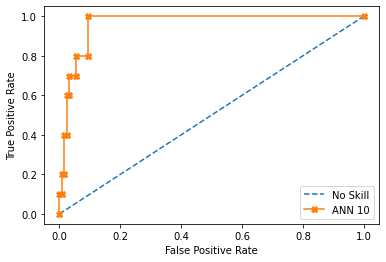

In [25]:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill' )
plt.plot(tnser_fpr_10, tnser_tpr_10, marker='X', label='ANN 10' )
plt.legend()
plt.show()

In [26]:
from sklearn.metrics import confusion_matrix

<function matplotlib.pyplot.show(close=None, block=None)>

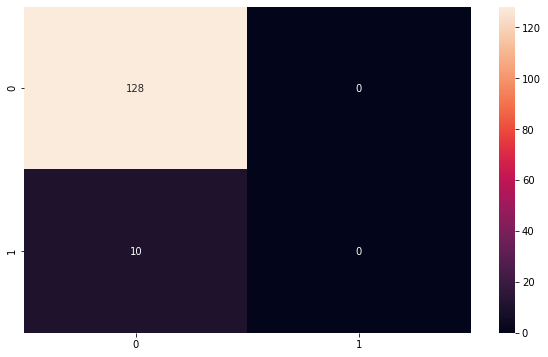

In [27]:
plt.figure(figsize = (10,6))
sns.heatmap(confusion_matrix(y10_test, pred10), annot = True,fmt='d')
plt.show

In [28]:
X20=prosody_data[selectedFeatures_Lasso_20]
y20=prosody_data['Hired']
X20_train, X20_test, y20_train, y20_test = train_test_split(X20, y20, test_size=0.20, random_state=10)

In [29]:
tf.keras.backend.set_floatx('float64')
model20 = keras.Sequential([
    keras.layers.Dense(20, input_shape=(20,), activation='relu'),
    keras.layers.Dense(18, activation='relu'),
    keras.layers.Dense(18, activation='relu'),
    keras.layers.Dense(18, activation='relu'),
    keras.layers.Dense(18, activation='relu'),
    keras.layers.Dense(18, activation='relu'),
    
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model20.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model20.fit(X20_train, y20_train, epochs=200)

Epoch 1/200
18/18 [==============================] - 0s 2ms/step - loss: 0.5378 - accuracy: 0.9185
Epoch 2/200
18/18 [==============================] - 0s 2ms/step - loss: 0.3090 - accuracy: 0.9275
Epoch 3/200
18/18 [==============================] - 0s 3ms/step - loss: 0.3320 - accuracy: 0.9257
Epoch 4/200
18/18 [==============================] - 0s 2ms/step - loss: 0.3382 - accuracy: 0.9257
Epoch 5/200
18/18 [==============================] - 0s 2ms/step - loss: 0.2826 - accuracy: 0.9257
Epoch 6/200
18/18 [==============================] - 0s 2ms/step - loss: 0.2936 - accuracy: 0.9239
Epoch 7/200
18/18 [==============================] - 0s 2ms/step - loss: 0.2939 - accuracy: 0.9275
Epoch 8/200
18/18 [==============================] - 0s 2ms/step - loss: 0.2711 - accuracy: 0.9239
Epoch 9/200
18/18 [==============================] - 0s 2ms/step - loss: 0.2656 - accuracy: 0.9275
Epoch 10/200
18/18 [==============================] - 0s 2ms/step - loss: 0.2771 - accuracy: 0.9275
Epoch 11/

18/18 [==============================] - 0s 1ms/step - loss: 0.2074 - accuracy: 0.9293
Epoch 84/200
18/18 [==============================] - 0s 1ms/step - loss: 0.1993 - accuracy: 0.9366
Epoch 85/200
18/18 [==============================] - 0s 1ms/step - loss: 0.2172 - accuracy: 0.9348
Epoch 86/200
18/18 [==============================] - 0s 1ms/step - loss: 0.1921 - accuracy: 0.9275
Epoch 87/200
18/18 [==============================] - 0s 1ms/step - loss: 0.1962 - accuracy: 0.9293
Epoch 88/200
18/18 [==============================] - 0s 1ms/step - loss: 0.1901 - accuracy: 0.9293
Epoch 89/200
18/18 [==============================] - 0s 1ms/step - loss: 0.2010 - accuracy: 0.9239
Epoch 90/200
18/18 [==============================] - 0s 1ms/step - loss: 0.1873 - accuracy: 0.9348
Epoch 91/200
18/18 [==============================] - 0s 1ms/step - loss: 0.1954 - accuracy: 0.9366
Epoch 92/200
18/18 [==============================] - 0s 1ms/step - loss: 0.2071 - accuracy: 0.9312
Epoch 93/200


18/18 [==============================] - 0s 2ms/step - loss: 0.1683 - accuracy: 0.9348
Epoch 165/200
18/18 [==============================] - 0s 1ms/step - loss: 0.1669 - accuracy: 0.9384
Epoch 166/200
18/18 [==============================] - 0s 1ms/step - loss: 0.1783 - accuracy: 0.9330
Epoch 167/200
18/18 [==============================] - 0s 2ms/step - loss: 0.1590 - accuracy: 0.9402
Epoch 168/200
18/18 [==============================] - 0s 2ms/step - loss: 0.1669 - accuracy: 0.9384
Epoch 169/200
18/18 [==============================] - 0s 2ms/step - loss: 0.1518 - accuracy: 0.9384
Epoch 170/200
18/18 [==============================] - 0s 2ms/step - loss: 0.1382 - accuracy: 0.9511
Epoch 171/200
18/18 [==============================] - 0s 2ms/step - loss: 0.1300 - accuracy: 0.9438
Epoch 172/200
18/18 [==============================] - 0s 1ms/step - loss: 0.2052 - accuracy: 0.9330
Epoch 173/200
18/18 [==============================] - 0s 2ms/step - loss: 0.1781 - accuracy: 0.9402
Epoc

In [73]:
model20.evaluate(X20_test, y20_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.1795 - accuracy: 0.9275


[0.17952355730981714, 0.927536231884058]

In [31]:
pred=model20.predict(X20_test)
pred20=[]
for element in pred:
    if element > 6:
        pred20.append(1)
    else:
        pred20.append(0)

In [32]:
print('MSE',metrics.mean_squared_error(y20_test,pred20))

MSE 0.07246376811594203


In [33]:
print(classification_report(y20_test,pred20,zero_division=0))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       128
           1       0.00      0.00      0.00        10

    accuracy                           0.93       138
   macro avg       0.46      0.50      0.48       138
weighted avg       0.86      0.93      0.89       138



In [34]:
tnser_probs = model20.predict(X20_test)

In [35]:
ns_probs = [0 for _ in range(len(y20_test))]
ns_auc = roc_auc_score(y20_test, ns_probs)
tnser_auc_20 = roc_auc_score(y20_test, tnser_probs)

In [36]:
ns_fpr, ns_tpr, _ = roc_curve(y20_test, ns_probs)
tnser_fpr_20, tnser_tpr_20, _ = roc_curve(y20_test, tnser_probs)

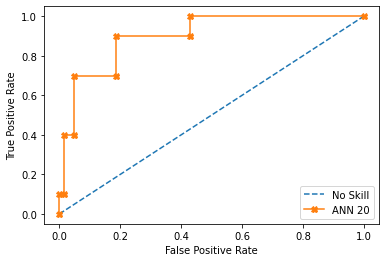

In [37]:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill' )
plt.plot(tnser_fpr_20, tnser_tpr_20, marker='X', label='ANN 20' )
plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

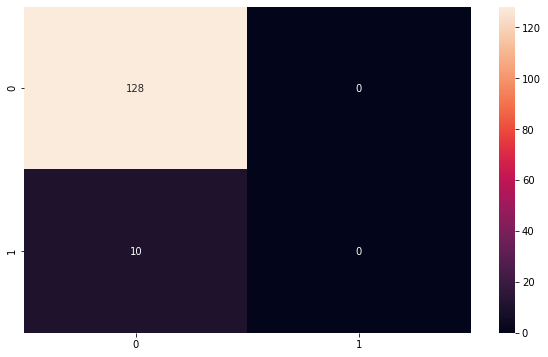

In [72]:
plt.figure(figsize = (10,6))
sns.heatmap(confusion_matrix(y20_test, pred20), annot = True,fmt='d')
plt.show

In [39]:
X30=prosody_data[selectedFeatures_Lasso_30]
y30=prosody_data['Hired']
X30_train, X30_test, y30_train, y30_test = train_test_split(X30, y30, test_size=0.20, random_state=10)

In [40]:
tf.keras.backend.set_floatx('float64')
model30 = keras.Sequential([
    keras.layers.Dense(30, input_shape=(30,), activation='relu'),
    keras.layers.Dense(24, activation='relu'),
    keras.layers.Dense(24, activation='relu'),
    keras.layers.Dense(24, activation='relu'),
    keras.layers.Dense(24, activation='relu'),
    keras.layers.Dense(24, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model30.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model30.fit(X30_train, y30_train, epochs=200)

Epoch 1/200
18/18 [==============================] - 0s 2ms/step - loss: 15.7829 - accuracy: 0.7899
Epoch 2/200
18/18 [==============================] - 0s 2ms/step - loss: 3.3050 - accuracy: 0.8949
Epoch 3/200
18/18 [==============================] - 0s 2ms/step - loss: 0.9855 - accuracy: 0.8859
Epoch 4/200
18/18 [==============================] - 0s 2ms/step - loss: 0.6058 - accuracy: 0.9022
Epoch 5/200
18/18 [==============================] - 0s 2ms/step - loss: 0.4371 - accuracy: 0.9094
Epoch 6/200
18/18 [==============================] - 0s 2ms/step - loss: 0.3838 - accuracy: 0.9022
Epoch 7/200
18/18 [==============================] - 0s 2ms/step - loss: 0.3800 - accuracy: 0.9167
Epoch 8/200
18/18 [==============================] - 0s 2ms/step - loss: 0.3732 - accuracy: 0.8913
Epoch 9/200
18/18 [==============================] - 0s 2ms/step - loss: 0.3240 - accuracy: 0.9149
Epoch 10/200
18/18 [==============================] - 0s 2ms/step - loss: 0.3732 - accuracy: 0.8986
Epoch 11

18/18 [==============================] - 0s 2ms/step - loss: 0.2182 - accuracy: 0.9257
Epoch 84/200
18/18 [==============================] - 0s 1ms/step - loss: 0.2599 - accuracy: 0.9293
Epoch 85/200
18/18 [==============================] - 0s 2ms/step - loss: 0.2623 - accuracy: 0.9203
Epoch 86/200
18/18 [==============================] - 0s 2ms/step - loss: 0.2800 - accuracy: 0.9239
Epoch 87/200
18/18 [==============================] - 0s 2ms/step - loss: 0.2338 - accuracy: 0.9312
Epoch 88/200
18/18 [==============================] - 0s 2ms/step - loss: 0.2099 - accuracy: 0.9257
Epoch 89/200
18/18 [==============================] - 0s 1ms/step - loss: 0.2356 - accuracy: 0.9293
Epoch 90/200
18/18 [==============================] - 0s 2ms/step - loss: 0.2205 - accuracy: 0.9348
Epoch 91/200
18/18 [==============================] - 0s 2ms/step - loss: 0.2010 - accuracy: 0.9275
Epoch 92/200
18/18 [==============================] - 0s 1ms/step - loss: 0.2375 - accuracy: 0.9257
Epoch 93/200


18/18 [==============================] - 0s 1ms/step - loss: 0.2005 - accuracy: 0.9330
Epoch 165/200
18/18 [==============================] - 0s 2ms/step - loss: 0.1883 - accuracy: 0.9312
Epoch 166/200
18/18 [==============================] - 0s 2ms/step - loss: 0.1741 - accuracy: 0.9402
Epoch 167/200
18/18 [==============================] - 0s 2ms/step - loss: 0.2120 - accuracy: 0.9221
Epoch 168/200
18/18 [==============================] - 0s 2ms/step - loss: 0.2392 - accuracy: 0.9149
Epoch 169/200
18/18 [==============================] - 0s 2ms/step - loss: 0.2050 - accuracy: 0.9293
Epoch 170/200
18/18 [==============================] - 0s 2ms/step - loss: 0.1936 - accuracy: 0.9275
Epoch 171/200
18/18 [==============================] - 0s 2ms/step - loss: 0.1843 - accuracy: 0.9366
Epoch 172/200
18/18 [==============================] - 0s 1ms/step - loss: 0.1718 - accuracy: 0.9402
Epoch 173/200
18/18 [==============================] - 0s 2ms/step - loss: 0.1726 - accuracy: 0.9312
Epoc

In [41]:
model30.evaluate(X30_test, y30_test)

5/5 [==============================] - 0s 1ms/step - loss: 0.1384 - accuracy: 0.9565


[0.13837942707797754, 0.9565217391304348]

In [75]:
pred=model30.predict(X30_test)
pred30=[]
for element in pred:
    if element > 6:
        pred30.append(1)
    else:
        pred30.append(0)
pred

array([[9.67903300e-03],
       [2.13246248e-02],
       [2.53685132e-04],
       [4.19175846e-57],
       [7.81651172e-01],
       [4.41595346e-02],
       [1.69538132e-01],
       [2.99088175e-02],
       [4.12296789e-02],
       [3.47875678e-01],
       [6.61653847e-02],
       [1.06983664e-01],
       [3.73842436e-01],
       [4.92065526e-02],
       [1.15920856e-01],
       [6.12598468e-02],
       [8.75566869e-02],
       [4.52280437e-02],
       [7.05080721e-06],
       [1.17828704e-01],
       [3.72297874e-03],
       [8.24034294e-03],
       [1.84153414e-01],
       [1.88700421e-02],
       [4.74661861e-02],
       [6.53304262e-01],
       [7.99164719e-02],
       [2.86884943e-02],
       [2.42102989e-35],
       [1.32723570e-19],
       [1.80329197e-01],
       [1.81268117e-02],
       [5.93006534e-42],
       [1.63492620e-02],
       [2.56115880e-01],
       [9.32836147e-03],
       [7.74409800e-01],
       [2.93476503e-03],
       [1.68474559e-03],
       [9.57686677e-03],


In [43]:
print('MSE',metrics.mean_squared_error(y30_test,pred30))

MSE 0.07246376811594203


In [44]:
print(classification_report(y30_test,pred30,zero_division=0))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       128
           1       0.00      0.00      0.00        10

    accuracy                           0.93       138
   macro avg       0.46      0.50      0.48       138
weighted avg       0.86      0.93      0.89       138



In [45]:
tnser_probs = model30.predict(X30_test)

In [46]:
ns_probs = [0 for _ in range(len(y30_test))]
ns_auc = roc_auc_score(y30_test, ns_probs)
tnser_auc_30 = roc_auc_score(y30_test, tnser_probs)

In [47]:
ns_fpr, ns_tpr, _ = roc_curve(y30_test, ns_probs)
tnser_fpr_30, tnser_tpr_30, _ = roc_curve(y30_test, tnser_probs)

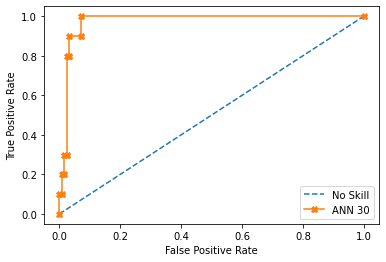

In [48]:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill' )
plt.plot(tnser_fpr_30, tnser_tpr_30, marker='X', label='ANN 30' )
plt.legend()
plt.show()

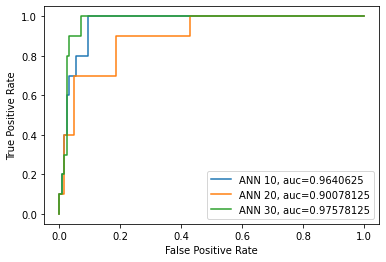

In [49]:
plt.plot(tnser_fpr_10, tnser_tpr_10, label="ANN 10, auc="+str(tnser_auc_10))
plt.plot(tnser_fpr_20, tnser_tpr_20, label="ANN 20, auc="+str(tnser_auc_20))
plt.plot(tnser_fpr_30, tnser_tpr_30, label="ANN 30, auc="+str(tnser_auc_30))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

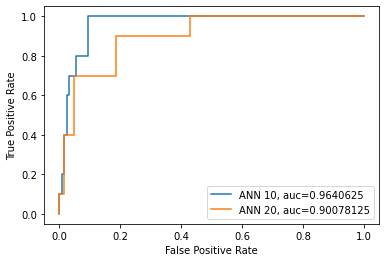

In [50]:
plt.plot(tnser_fpr_10, tnser_tpr_10, label="ANN 10, auc="+str(tnser_auc_10))
plt.plot(tnser_fpr_20, tnser_tpr_20, label="ANN 20, auc="+str(tnser_auc_20))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

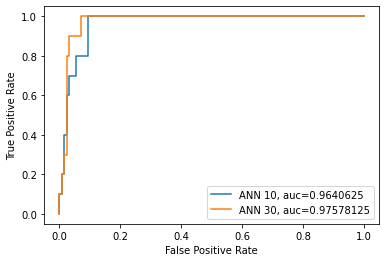

In [51]:
plt.plot(tnser_fpr_10, tnser_tpr_10, label="ANN 10, auc="+str(tnser_auc_10))

plt.plot(tnser_fpr_30, tnser_tpr_30, label="ANN 30, auc="+str(tnser_auc_30))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Apply SVN

In [52]:
X20_train, X20_test, y20_train, y20_test = train_test_split(X20, y20, test_size=0.20,random_state=10)

In [53]:
from sklearn.svm import SVC

In [54]:
svc_model = SVC()

In [55]:
svc_model.fit(X20_train,y20_train)

SVC()

In [56]:
svc_pred = svc_model.predict(X20_test)

In [57]:
print(confusion_matrix(y20_test,svc_pred))

[[128   0]
 [ 10   0]]


In [58]:
print(classification_report(y20_test,svc_pred,zero_division=0))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       128
           1       0.00      0.00      0.00        10

    accuracy                           0.93       138
   macro avg       0.46      0.50      0.48       138
weighted avg       0.86      0.93      0.89       138



In [59]:
tnser_probs = svc_model.predict(X20_test)

In [60]:
ns_probs = [0 for _ in range(len(y20_test))]
ns_auc = roc_auc_score(y20_test, ns_probs)
tnser_auc_20_svm = roc_auc_score(y20_test, tnser_probs)

In [61]:
ns_fpr, ns_tpr, _ = roc_curve(y20_test, ns_probs)
tnser_fpr_20_svm, tnser_tpr_20_svm, _ = roc_curve(y20_test, tnser_probs)

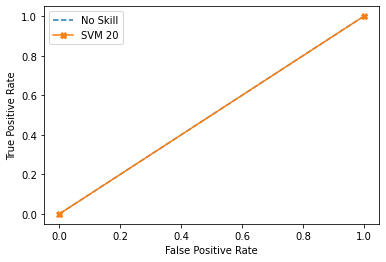

In [62]:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill' )
plt.plot(tnser_fpr_20_svm, tnser_tpr_20_svm, marker='X', label='SVM 20' )
plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

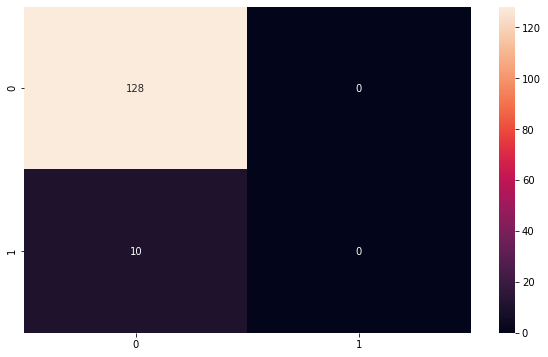

In [63]:
plt.figure(figsize = (10,6))
sns.heatmap(confusion_matrix(y20_test, svc_pred), annot = True,fmt='d')
plt.show

In [64]:
from sklearn.neighbors import KNeighborsClassifier

In [65]:
knn = KNeighborsClassifier(n_neighbors=1)

In [66]:
knn.fit(X20_train,y20_train)

KNeighborsClassifier(n_neighbors=1)

In [67]:
knn_pred = knn.predict(X20_test)

In [68]:
print(classification_report(y20_test,knn_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       128
           1       0.33      0.40      0.36        10

    accuracy                           0.90       138
   macro avg       0.64      0.67      0.65       138
weighted avg       0.91      0.90      0.90       138



In [69]:
ns_probs = [0 for _ in range(len(y20_test))]
ns_auc = roc_auc_score(y20_test, ns_probs)
tnser_auc_20_knn = roc_auc_score(y20_test, knn_pred)

ns_fpr, ns_tpr, _ = roc_curve(y20_test, ns_probs)
tnser_fpr_20_knn, tnser_tpr_20_knn, _ = roc_curve(y20_test, knn_pred)

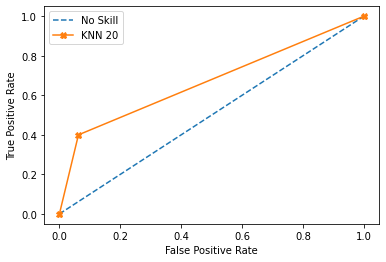

In [70]:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill' )
plt.plot(tnser_fpr_20_knn, tnser_tpr_20_knn, marker='X', label='KNN 20' )
plt.legend()
plt.show()

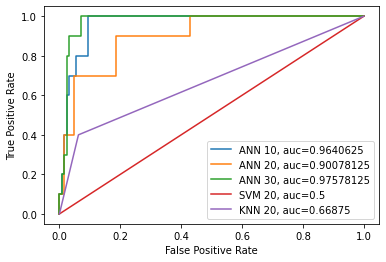

In [71]:
plt.plot(tnser_fpr_10, tnser_tpr_10, label="ANN 10, auc="+str(tnser_auc_10))
plt.plot(tnser_fpr_20, tnser_tpr_20, label="ANN 20, auc="+str(tnser_auc_20))
plt.plot(tnser_fpr_30, tnser_tpr_30, label="ANN 30, auc="+str(tnser_auc_30))
plt.plot(tnser_fpr_20_svm, tnser_tpr_20_svm, label="SVM 20, auc="+str(tnser_auc_20_svm))
plt.plot(tnser_fpr_20_knn, tnser_tpr_20_knn, label="KNN 20, auc="+str(tnser_auc_20_knn))


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()